In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

# HWData klasörünün yolu
hwdata_path = "/content/drive/MyDrive/HWData"

# HWData klasörünü listele
list_files(hwdata_path)


HWData/
    train/
        BACKGROUND_Google/
            image_0332.jpg
            image_0334.jpg
            image_0333.jpg
            image_0364.jpg
            image_0328.jpg
            image_0331.jpg
            image_0329.jpg
            image_0330.jpg
            image_0360.jpg
            image_0358.jpg
            image_0359.jpg
            image_0356.jpg
            image_0357.jpg
            image_0354.jpg
            image_0355.jpg
            image_0353.jpg
            image_0351.jpg
            image_0352.jpg
            image_0348.jpg
            image_0349.jpg
            image_0350.jpg
            image_0346.jpg
            image_0347.jpg
            image_0345.jpg
            image_0344.jpg
            image_0342.jpg
            image_0341.jpg
            image_0339.jpg
            image_0343.jpg
            image_0338.jpg
            image_0390.jpg
            image_0389.jpg
            image_0336.jpg
            image_0337.jpg
            image_0387.jpg
         

In [ ]:
import os
import cv2
import numpy as np

def read_and_convert_images(folder_path, target_size=(64, 64)):
    image_vectors = []
    class_matrices = {}

    for class_folder in sorted(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            class_vectors = []
            for file in os.listdir(class_path):
                if file.endswith('.jpg') or file.endswith('.png'):
                    image_path = os.path.join(class_path, file)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    resized_image = cv2.resize(image, target_size)
                    vector = resized_image.flatten()
                    class_vectors.append(vector)
                    image_vectors.append(vector)
            class_matrices[class_folder] = np.array(class_vectors).T  # Transpose to get 4096 x n format

    image_vectors = np.array(image_vectors).T  # Transpose to get 4096 x m format

    return image_vectors, class_matrices

# HWData klasörünün yolu
hwdata_path = "/content/drive/MyDrive/HWData/train"
hwdata_test="/content/drive/MyDrive/HWData/test"
# Resimleri vektör formatına dönüştürme
image_vectors, class_matrices = read_and_convert_images(hwdata_path)

test_vector, class_matrice=read_and_convert_images(hwdata_test)

# Örnek olarak bir sınıf matrisini yazdırma
for class_name, class_matrix in class_matrices.items():
    print("Class:", class_name)
    print("Matrix shape:", class_matrix.shape)
    print(class_matrix)
    print()


Class: BACKGROUND_Google
Matrix shape: (4096, 94)
[[ 28 209 193 ... 163 255  35]
 [ 27 198 193 ... 197 254  56]
 [ 27 152 193 ... 143 254 108]
 ...
 [147  73 193 ... 247 230  40]
 [150 161 192 ... 253 144  37]
 [202 181 192 ... 252 126  36]]

Class: accordion
Matrix shape: (4096, 12)
[[0 4 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 ...
 [0 5 2 ... 0 0 0]
 [0 3 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]

Class: airplanes
Matrix shape: (4096, 21)
[[254 255  87 ... 123 253 253]
 [251 253  86 ... 124 253 254]
 [251 253  88 ... 126 253 253]
 ...
 [253 254  87 ... 123 105 108]
 [255 253  84 ... 121 249 108]
 [254 254  84 ... 118 252 106]]

Class: anchor
Matrix shape: (4096, 9)
[[  8 149  43 ... 188   0  64]
 [  3 120  76 ... 184   0 208]
 [ 11 116  90 ... 185   0 197]
 ...
 [ 46  83  42 ...  60   7 143]
 [ 56  77  42 ...  56   5 147]
 [ 64  69  32 ...  52   1 137]]

Class: ant
Matrix shape: (4096, 9)
[[255   0 146 ...   0 130 255]
 [255   5 136 ...   4 129 255]
 [255   1 137 ...   0 136 255]


In [ ]:
# PCA Step1:
# # Extract covariance matrix for each class data (4096xn). Each covariance matrix will
# # be nxn format.

def calculate_covariance_matrix(class_matrix):
  """
  Calculates the covariance matrix for a given class matrix.

  Args:
    class_matrix: A 2D numpy array containing the data for a single class.

  Returns:
    A 2D numpy array representing the covariance matrix for the class.
  """

  mean_vector = np.mean(class_matrix, axis=1)
  covariance_matrix = np.cov(class_matrix.T - mean_vector)

  return covariance_matrix

# Calculate and print the covariance matrix for each class
for class_name, class_matrix in class_matrices.items():
  covariance_matrix = calculate_covariance_matrix(class_matrix)
  print("Class:", class_name)
  print("Covariance matrix shape:", covariance_matrix.shape)
 # print(covariance_matrix)
  print()


Class: BACKGROUND_Google
Covariance matrix shape: (94, 94)

Class: accordion
Covariance matrix shape: (12, 12)

Class: airplanes
Covariance matrix shape: (21, 21)

Class: anchor
Covariance matrix shape: (9, 9)

Class: ant
Covariance matrix shape: (9, 9)

Class: barrel
Covariance matrix shape: (10, 10)

Class: bass
Covariance matrix shape: (12, 12)

Class: beaver
Covariance matrix shape: (10, 10)

Class: binocular
Covariance matrix shape: (8, 8)

Class: bonsai
Covariance matrix shape: (27, 27)

Class: brain
Covariance matrix shape: (21, 21)

Class: brontosaurus
Covariance matrix shape: (10, 10)

Class: buddha
Covariance matrix shape: (18, 18)

Class: butterfly
Covariance matrix shape: (19, 19)

Class: camera
Covariance matrix shape: (11, 11)



In [ ]:
# PCA Step2:
# # Extract eigenvalues and eigenvectors from covariance matrices. There will be n
# # eigenvalues and n eigenvectors. Each eigenvector is in the nx1 format


# Extract eigenvalues and eigenvectors for each class
eigenvalues = {}
eigenvectors = {}

for class_name, class_matrix in class_matrices.items():
    covariance_matrix = calculate_covariance_matrix(class_matrix)
    eigenvalues[class_name], eigenvectors[class_name] = np.linalg.eig(covariance_matrix)

# Print the eigenvalues and eigenvectors for each class
for class_name, eigenvalue in eigenvalues.items():
    print("Class:", class_name)
    print("Eigenvalues:", eigenvalue.shape)

for class_name, eigenvector in eigenvectors.items():
    print("Class:", class_name)
    print("Eigenvectors:", eigenvector.shape)


Class: BACKGROUND_Google
Eigenvalues: (94,)
Class: accordion
Eigenvalues: (12,)
Class: airplanes
Eigenvalues: (21,)
Class: anchor
Eigenvalues: (9,)
Class: ant
Eigenvalues: (9,)
Class: barrel
Eigenvalues: (10,)
Class: bass
Eigenvalues: (12,)
Class: beaver
Eigenvalues: (10,)
Class: binocular
Eigenvalues: (8,)
Class: bonsai
Eigenvalues: (27,)
Class: brain
Eigenvalues: (21,)
Class: brontosaurus
Eigenvalues: (10,)
Class: buddha
Eigenvalues: (18,)
Class: butterfly
Eigenvalues: (19,)
Class: camera
Eigenvalues: (11,)
Class: BACKGROUND_Google
Eigenvectors: (94, 94)
Class: accordion
Eigenvectors: (12, 12)
Class: airplanes
Eigenvectors: (21, 21)
Class: anchor
Eigenvectors: (9, 9)
Class: ant
Eigenvectors: (9, 9)
Class: barrel
Eigenvectors: (10, 10)
Class: bass
Eigenvectors: (12, 12)
Class: beaver
Eigenvectors: (10, 10)
Class: binocular
Eigenvectors: (8, 8)
Class: bonsai
Eigenvectors: (27, 27)
Class: brain
Eigenvectors: (21, 21)
Class: brontosaurus
Eigenvectors: (10, 10)
Class: buddha
Eigenvectors:

In [ ]:
# PCA Step3:
# Sort eigenvalues in descending order and select the eigenvectors corresponding to three (3) maximum eigenvalues.

# Initialize a dictionary to store the top 3 eigenvectors for each class
top_eigenvectors = {}

for class_name, class_matrix in class_matrices.items():
    # Calculate covariance matrix for the class
    covariance_matrix = calculate_covariance_matrix(class_matrix)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top 3 eigenvectors
    top_eigenvectors[class_name] = sorted_eigenvectors[:, :3]

# Print the top 3 eigenvectors for each class
for class_name, eigenvector_matrix in top_eigenvectors.items():
    print("Class:", class_name)
    print("Top 3 Eigenvectors shape:", eigenvector_matrix.shape)


Class: BACKGROUND_Google
Top 3 Eigenvectors shape: (94, 3)
Class: accordion
Top 3 Eigenvectors shape: (12, 3)
Class: airplanes
Top 3 Eigenvectors shape: (21, 3)
Class: anchor
Top 3 Eigenvectors shape: (9, 3)
Class: ant
Top 3 Eigenvectors shape: (9, 3)
Class: barrel
Top 3 Eigenvectors shape: (10, 3)
Class: bass
Top 3 Eigenvectors shape: (12, 3)
Class: beaver
Top 3 Eigenvectors shape: (10, 3)
Class: binocular
Top 3 Eigenvectors shape: (8, 3)
Class: bonsai
Top 3 Eigenvectors shape: (27, 3)
Class: brain
Top 3 Eigenvectors shape: (21, 3)
Class: brontosaurus
Top 3 Eigenvectors shape: (10, 3)
Class: buddha
Top 3 Eigenvectors shape: (18, 3)
Class: butterfly
Top 3 Eigenvectors shape: (19, 3)
Class: camera
Top 3 Eigenvectors shape: (11, 3)


In [ ]:
#  Stage3: Extract PCA features by using Eigenvectors.
# # In previous stage, you have extracted eigenvectors. Now, you will project the each
# # class matrix (4096xn) into the eigenvector matrix of nx3 format. For this purpose, you
# # have to multiply with eigenvector matrix.
# # After projections, each class is represented with 4096x3 feature matrix.

pca_features = {}

for class_name, class_matrix in class_matrices.items():
    pca_features[class_name] = np.dot(class_matrix,top_eigenvectors[class_name])

# Print the shape of the PCA features for each class
for class_name, features in pca_features.items():
    print("Class:", class_name)
    print("PCA Features shape:", features.shape)

# PCA features are now stored in the pca_features dictionary for each class.


Class: BACKGROUND_Google
PCA Features shape: (4096, 3)
Class: accordion
PCA Features shape: (4096, 3)
Class: airplanes
PCA Features shape: (4096, 3)
Class: anchor
PCA Features shape: (4096, 3)
Class: ant
PCA Features shape: (4096, 3)
Class: barrel
PCA Features shape: (4096, 3)
Class: bass
PCA Features shape: (4096, 3)
Class: beaver
PCA Features shape: (4096, 3)
Class: binocular
PCA Features shape: (4096, 3)
Class: bonsai
PCA Features shape: (4096, 3)
Class: brain
PCA Features shape: (4096, 3)
Class: brontosaurus
PCA Features shape: (4096, 3)
Class: buddha
PCA Features shape: (4096, 3)
Class: butterfly
PCA Features shape: (4096, 3)
Class: camera
PCA Features shape: (4096, 3)


In [ ]:
# In order to predict the class label of a test sample, you should follow below steps.
# # Step1: Read image from test directory
# # Step2: Convert into the test vector format 4096x1. Then, combine n times the test
# # vector. The size will be 4096xn. Then, you have to multiply with eigenvector matrix of
# # nx3. Each test sample is again represented with 4096x3 feature matrix.

# Step1: Read image from test directory
#test_image_path =  "/content/drive/MyDrive/HWData/test/ant/image_0041.jpg"
test_image_path ="/content/drive/MyDrive/HWData/test/camera/image_0048.jpg"
test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
resized_test_image = cv2.resize(test_image, (64,64))
test_vector = resized_test_image.flatten()

# Step2: Convert into the test vector format 4096x1. Then, combine n times the test
# vector. The size will be 4096xn. Then, you have to multiply with eigenvector matrix of
# nx3. Each test sample is again represented with 4096x3 feature matrix.

# Combine n times the test vector
n = 11
test_vectors = np.tile(test_vector, (n, 1))

# Multiply with eigenvector matrix
pca_features_test = np.dot(test_vectors.T, top_eigenvectors["camera"])

# Print the shape of the PCA features for the test sample
print("PCA Features shape for test sample:", pca_features_test.shape)



PCA Features shape for test sample: (4096, 3)


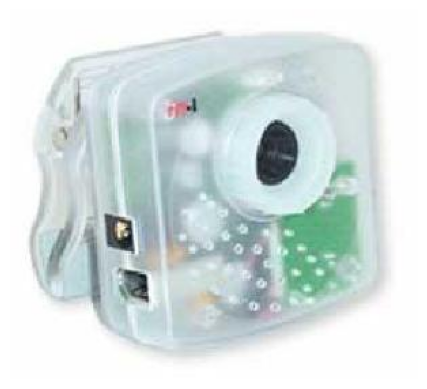


Image displayed successfully.


Predicted class for the test sample: camera


In [ ]:
# Step3: Compute sum of absolute distance between train feature matrix and test
# # feature matrix.
# # Example: For a test sample (S), compute following distances and the class label will
# # be determined with minimum distance.
# # distance1 = np.sum( np.abs(S-C1) ) The label of test sample will be class name of corresponding minimum
# # distance.
from PIL import Image
import matplotlib.pyplot as plt
# Initialize a dictionary to store the distances between the test sample and each class
distances = {}

# Loop through each class and calculate the distance between the test sample and the class's PCA features
for class_name, class_features in pca_features.items():
    distances[class_name] = np.sum(np.abs(pca_features_test - class_features), axis=1)

# Find the class with the minimum distance to the test sample
minimum_distance = float('inf')
predicted_class = None

# Modify the code to use `np.any()` instead of direct comparison
for class_name, distance in distances.items():
    if np.any(distance < minimum_distance):
        minimum_distance = distance
        predicted_class = class_name

try:
    image = Image.open(test_image_path)
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
    print()
    print("Image displayed successfully.")
except Exception as e:
    print("Error occurred while loading the image:", e)

print()
print()
# Print the predicted class for the test sample
print("Predicted class for the test sample:", predicted_class)
